# HR-Employee-Attrition Project

In [1]:
#Importing All Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv("HR-Employee-Attrition.csv")
pd.set_option('display.max_columns',None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Observation:
Some columns are in integer type
some columns are in object string type.

In [5]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Observation:
Since there are some catagirical and continious columns we need to check for nunique() method.
'Attrition' is Target variable.
Other columns are Independent variables.
Almost all columns have different value counts.
Only 'EmployeeCount','StandardHours','Over18' have only one value.May be not required for model building.

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Observation:
From the above isnull() function we can see that there are no null values in dataset.

<AxesSubplot:>

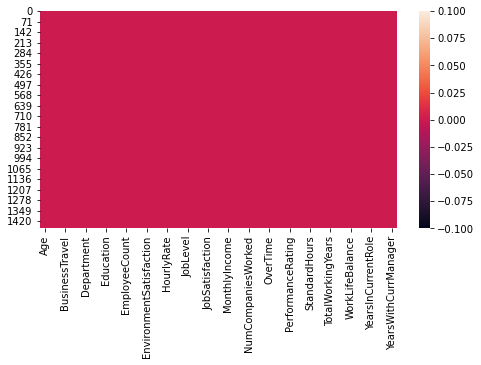

In [7]:
plt.figure(figsize=[8,4])
sns.heatmap(df.isnull())

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [10]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [11]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [12]:
collist=obj_df.columns.values
collist

array(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype=object)

In [13]:
df_encode=df.copy()

In [14]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [15]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in collist:
    df_encode.loc[:,column] = LE.fit_transform(df_encode.loc[:,column]) 

In [16]:
for columns in df_encode.columns:
    print(columns,"=",df_encode[columns].nunique())

Age = 43
Attrition = 2
BusinessTravel = 3
DailyRate = 886
Department = 3
DistanceFromHome = 29
Education = 5
EducationField = 6
EmployeeCount = 1
EmployeeNumber = 1470
EnvironmentSatisfaction = 4
Gender = 2
HourlyRate = 71
JobInvolvement = 4
JobLevel = 5
JobRole = 9
JobSatisfaction = 4
MaritalStatus = 3
MonthlyIncome = 1349
MonthlyRate = 1427
NumCompaniesWorked = 10
Over18 = 1
OverTime = 2
PercentSalaryHike = 15
PerformanceRating = 2
RelationshipSatisfaction = 4
StandardHours = 1
StockOptionLevel = 4
TotalWorkingYears = 40
TrainingTimesLastYear = 7
WorkLifeBalance = 4
YearsAtCompany = 37
YearsInCurrentRole = 19
YearsSinceLastPromotion = 16
YearsWithCurrManager = 18


In [17]:
column_drop=["EmployeeCount","Over18","StandardHours"]
df_column_dropped=df_encode.copy()

In [18]:
df_column_dropped.drop(column_drop,axis=1,inplace=True)

In [19]:
df_column_dropped.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [20]:
df_column_dropped.shape

(1470, 32)

# EDA

### univariate Analysis:

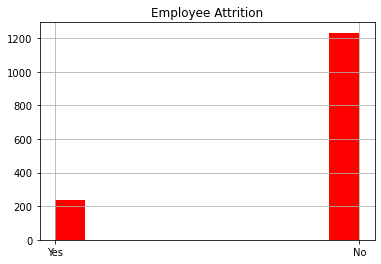

In [21]:
df["Attrition"].hist(grid=True,color='red')
plt.title("Employee Attrition")
plt.show()

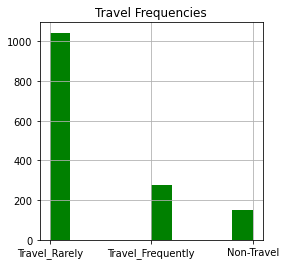

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

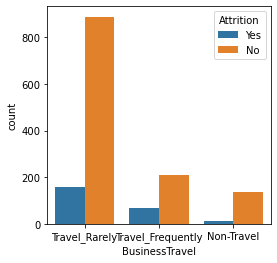

In [22]:
plt.subplots(figsize=(4,4))
df["BusinessTravel"].hist(grid=True,color='green')
plt.title("Travel Frequencies")
plt.show()
plt.subplots(figsize=(4,4))
sns.countplot(x='BusinessTravel',data=df,hue='Attrition')

<AxesSubplot:xlabel='Department', ylabel='count'>

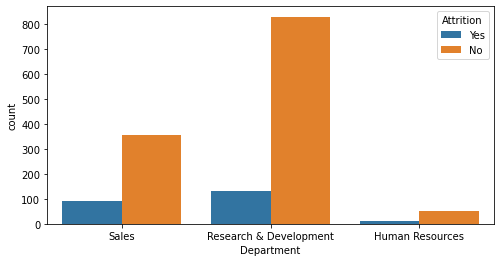

In [23]:
plt.subplots(figsize=(8,4))
sns.countplot(x='Department',data=df,hue='Attrition')

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

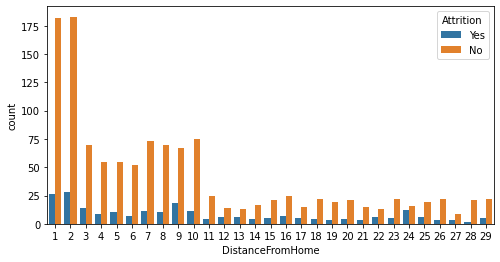

In [24]:
plt.subplots(figsize=(8,4))
sns.countplot(x='DistanceFromHome',data=df,hue='Attrition')

<AxesSubplot:xlabel='EducationField', ylabel='count'>

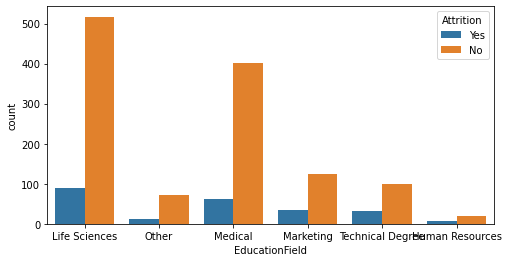

In [25]:
plt.subplots(figsize=(8,4))
sns.countplot(x='EducationField',data=df,hue='Attrition')

<AxesSubplot:xlabel='Gender', ylabel='count'>

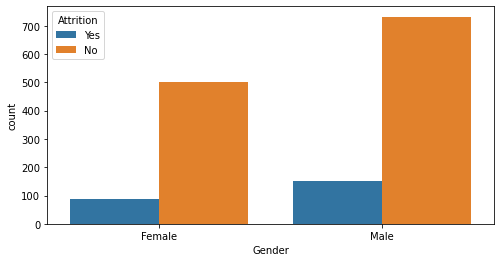

In [26]:
plt.subplots(figsize=(8,4))
sns.countplot(x='Gender',data=df,hue='Attrition')

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

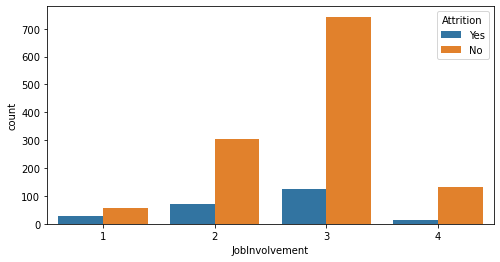

In [27]:
plt.subplots(figsize=(8,4))
sns.countplot(x='JobInvolvement',data=df,hue='Attrition')

<AxesSubplot:xlabel='JobRole', ylabel='count'>

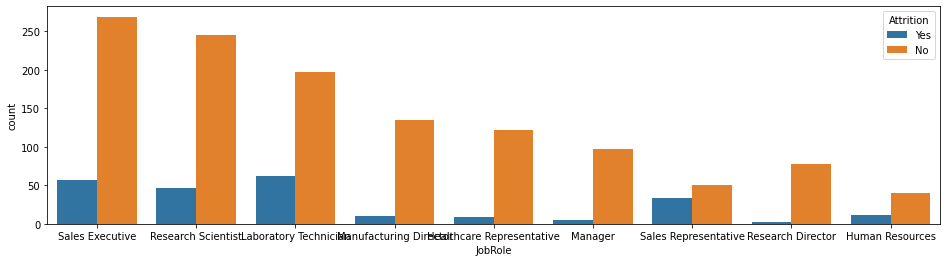

In [28]:
plt.subplots(figsize=(16,4))
sns.countplot(x='JobRole',data=df,hue='Attrition')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

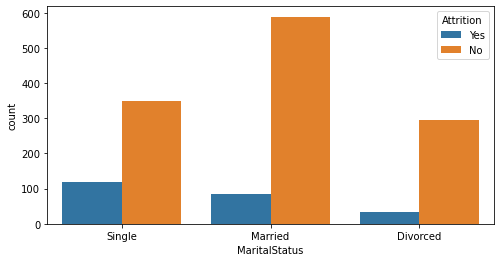

In [29]:
plt.subplots(figsize=(8,4))
sns.countplot(x='MaritalStatus',data=df,hue='Attrition')

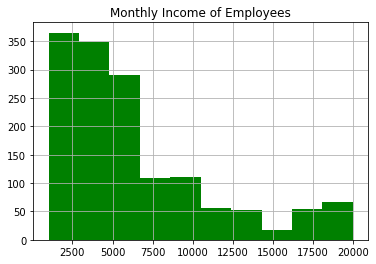

In [30]:
df["MonthlyIncome"].hist(grid=True,color='green')
plt.title("Monthly Income of Employees")
plt.show()

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

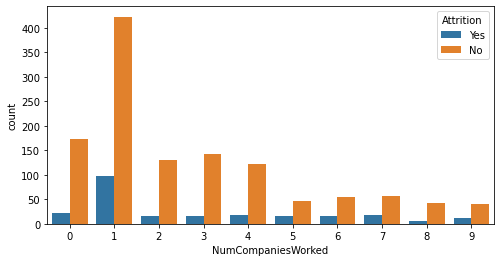

In [31]:
plt.subplots(figsize=(8,4))
sns.countplot(x='NumCompaniesWorked',data=df,hue='Attrition')

<AxesSubplot:xlabel='OverTime', ylabel='count'>

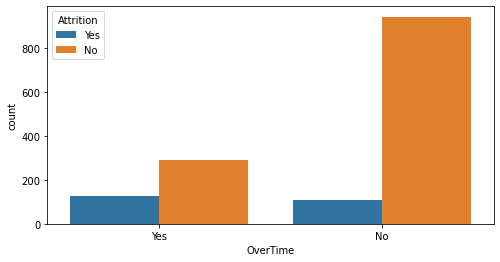

In [32]:
plt.subplots(figsize=(8,4))
sns.countplot(x='OverTime',data=df,hue='Attrition')

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

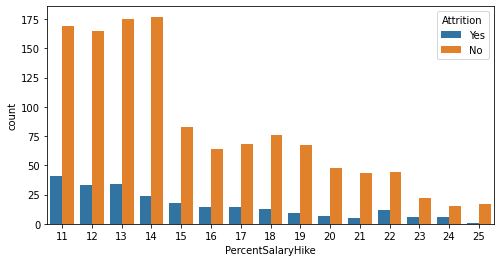

In [33]:
plt.subplots(figsize=(8,4))
sns.countplot(x='PercentSalaryHike',data=df,hue='Attrition')

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

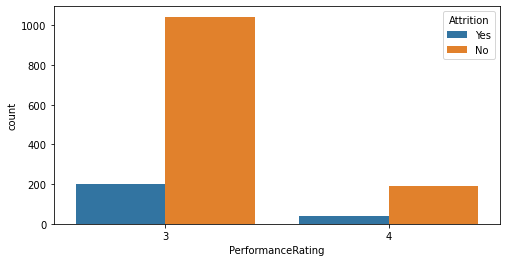

In [34]:
plt.subplots(figsize=(8,4))
sns.countplot(x='PerformanceRating',data=df,hue='Attrition')

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

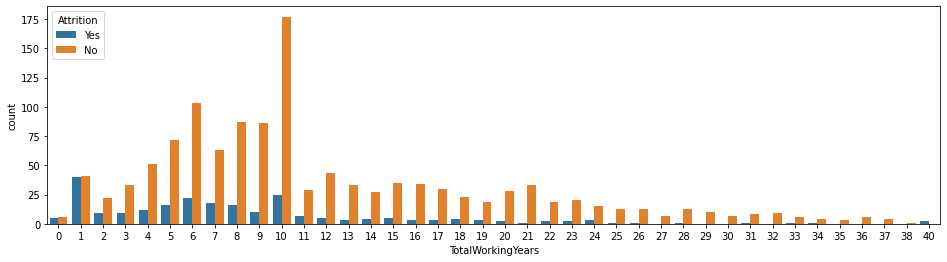

In [35]:
plt.subplots(figsize=(16,4))
sns.countplot(x='TotalWorkingYears',data=df,hue='Attrition')

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

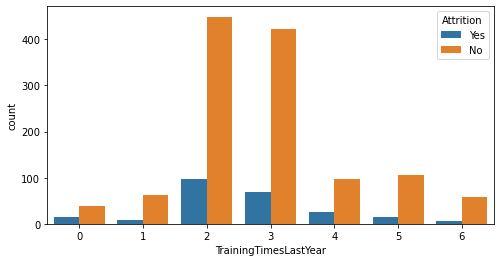

In [36]:
plt.subplots(figsize=(8,4))
sns.countplot(x='TrainingTimesLastYear',data=df,hue='Attrition')

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

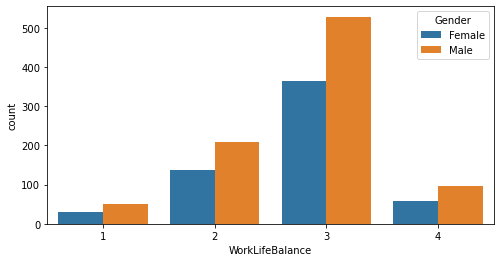

In [37]:
plt.subplots(figsize=(8,4))
sns.countplot(x='WorkLifeBalance',data=df,hue='Gender')

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

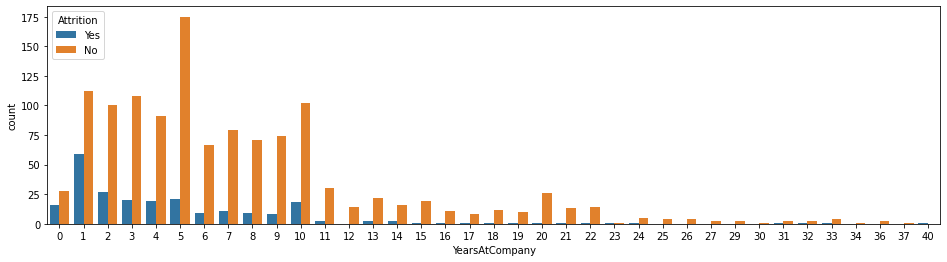

In [38]:
plt.subplots(figsize=(16,4))
sns.countplot(x='YearsAtCompany',data=df,hue='Attrition')

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

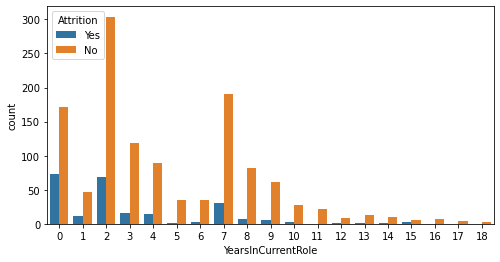

In [39]:
plt.subplots(figsize=(8,4))
sns.countplot(x='YearsInCurrentRole',data=df,hue='Attrition')

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

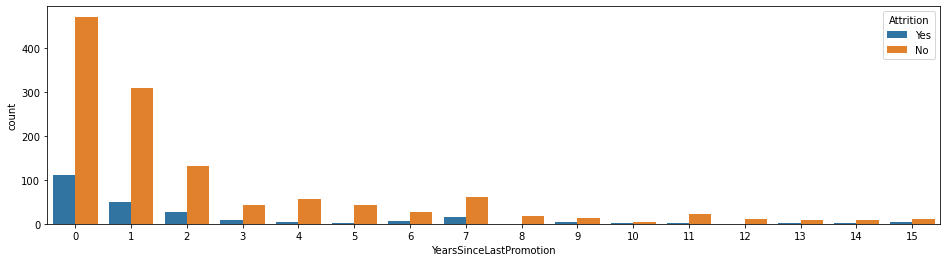

In [40]:
plt.subplots(figsize=(16,4))
sns.countplot(x='YearsSinceLastPromotion',data=df,hue='Attrition')

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

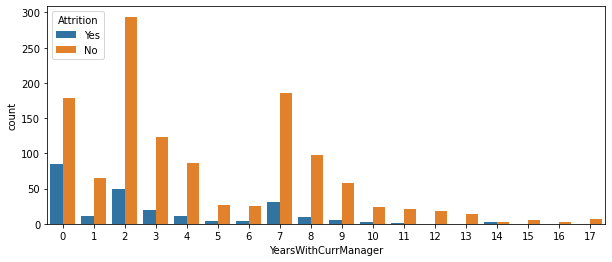

In [41]:
plt.subplots(figsize=(10,4))
sns.countplot(x='YearsWithCurrManager',data=df,hue='Attrition')

### Bivariate Analysis:

<AxesSubplot:title={'center':' Age wise employees on each Departments'}, xlabel='Department', ylabel='Age'>

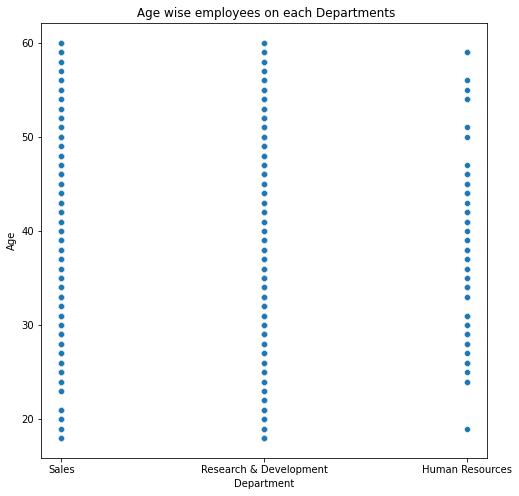

In [42]:
plt.figure(figsize=[8,8])
plt.title(' Age wise employees on each Departments')
sns.scatterplot(df['Department'],df['Age'])

<AxesSubplot:title={'center':'JobInvolvement with Age'}, xlabel='JobInvolvement', ylabel='Age'>

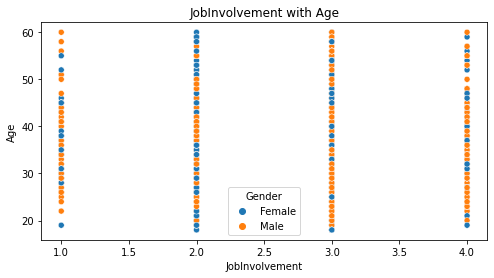

In [43]:
plt.figure(figsize=[8,4])
plt.title('JobInvolvement with Age')
sns.scatterplot(df['JobInvolvement'],df['Age'],hue=df['Gender'])

<AxesSubplot:title={'center':'MaritalStatus with Age'}, xlabel='MaritalStatus', ylabel='Age'>

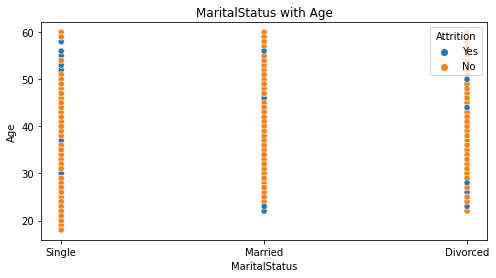

In [44]:
plt.figure(figsize=[8,4])
plt.title('MaritalStatus with Age')
sns.scatterplot(df['MaritalStatus'],df['Age'],hue=df['Attrition'])

<AxesSubplot:title={'center':'Monthly income with Age'}, xlabel='MonthlyIncome', ylabel='Age'>

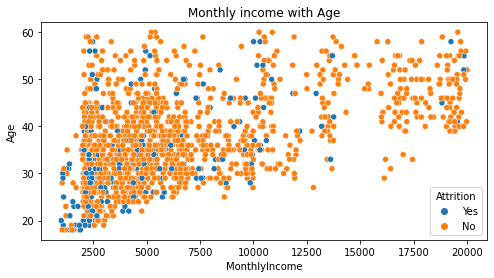

In [45]:
plt.figure(figsize=[8,4])
plt.title('Monthly income with Age')
sns.scatterplot(df['MonthlyIncome'],df['Age'],hue=df['Attrition'])

<AxesSubplot:title={'center':'JobInvolvement with Number of company worked'}, xlabel='JobInvolvement', ylabel='NumCompaniesWorked'>

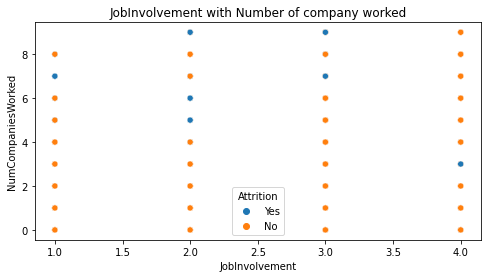

In [46]:
plt.figure(figsize=[8,4])
plt.title('JobInvolvement with Number of company worked')
sns.scatterplot(df['JobInvolvement'],df['NumCompaniesWorked'],hue=df['Attrition'])

<AxesSubplot:title={'center':'Total Working Years with Performance Rating'}, xlabel='TotalWorkingYears', ylabel='PerformanceRating'>

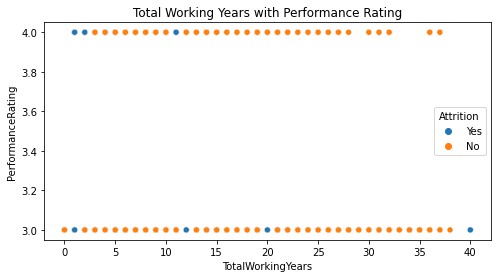

In [47]:
plt.figure(figsize=[8,4])
plt.title('Total Working Years with Performance Rating')
sns.scatterplot(df['TotalWorkingYears'],df['PerformanceRating'],hue=df['Attrition'])

<AxesSubplot:title={'center':'Years at company with Gender'}, xlabel='YearsAtCompany', ylabel='Gender'>

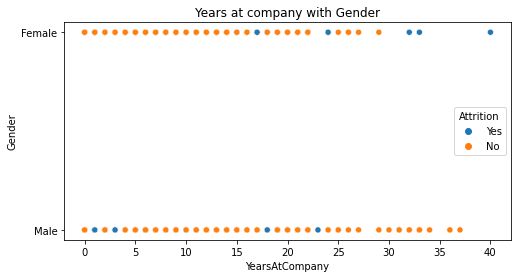

In [48]:
plt.figure(figsize=[8,4])
plt.title('Years at company with Gender')
sns.scatterplot(df['YearsAtCompany'],df['Gender'],hue=df['Attrition'])

<AxesSubplot:title={'center':'Years in company Vs Role'}, xlabel='YearsAtCompany', ylabel='YearsInCurrentRole'>

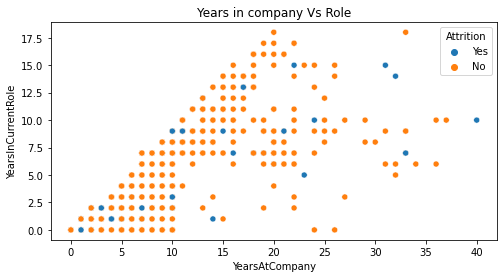

In [49]:
plt.figure(figsize=[8,4])
plt.title('Years in company Vs Role')
sns.scatterplot(df['YearsAtCompany'],df['YearsInCurrentRole'],hue=df['Attrition'])

<AxesSubplot:title={'center':'Years in company with same Manager'}, xlabel='YearsAtCompany', ylabel='YearsWithCurrManager'>

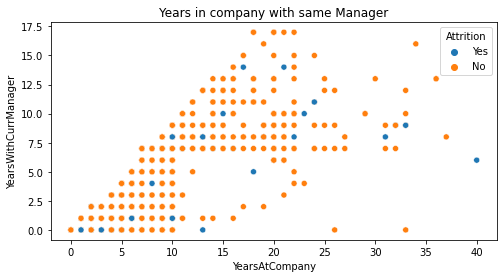

In [50]:
plt.figure(figsize=[8,4])
plt.title('Years in company with same Manager')
sns.scatterplot(df['YearsAtCompany'],df['YearsWithCurrManager'],hue=df['Attrition'])

<AxesSubplot:title={'center':'JobInvolvement with Age'}, xlabel='JobLevel', ylabel='MonthlyIncome'>

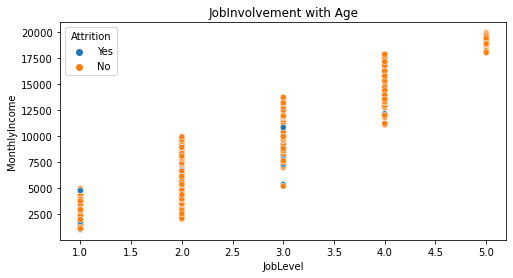

In [51]:
plt.figure(figsize=[8,4])
plt.title('JobInvolvement with Age')
sns.scatterplot(df['JobLevel'],df['MonthlyIncome'],hue=df['Attrition'])

### Multivariate Analysis:

In [52]:
corr_mat=df_column_dropped.corr()
corr_mat

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,0.022556,0.035179,-0.006888,-0.018519,-0.010336,-0.046247,-0.008155,-0.014829,0.012648,-0.001251,-0.024037,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


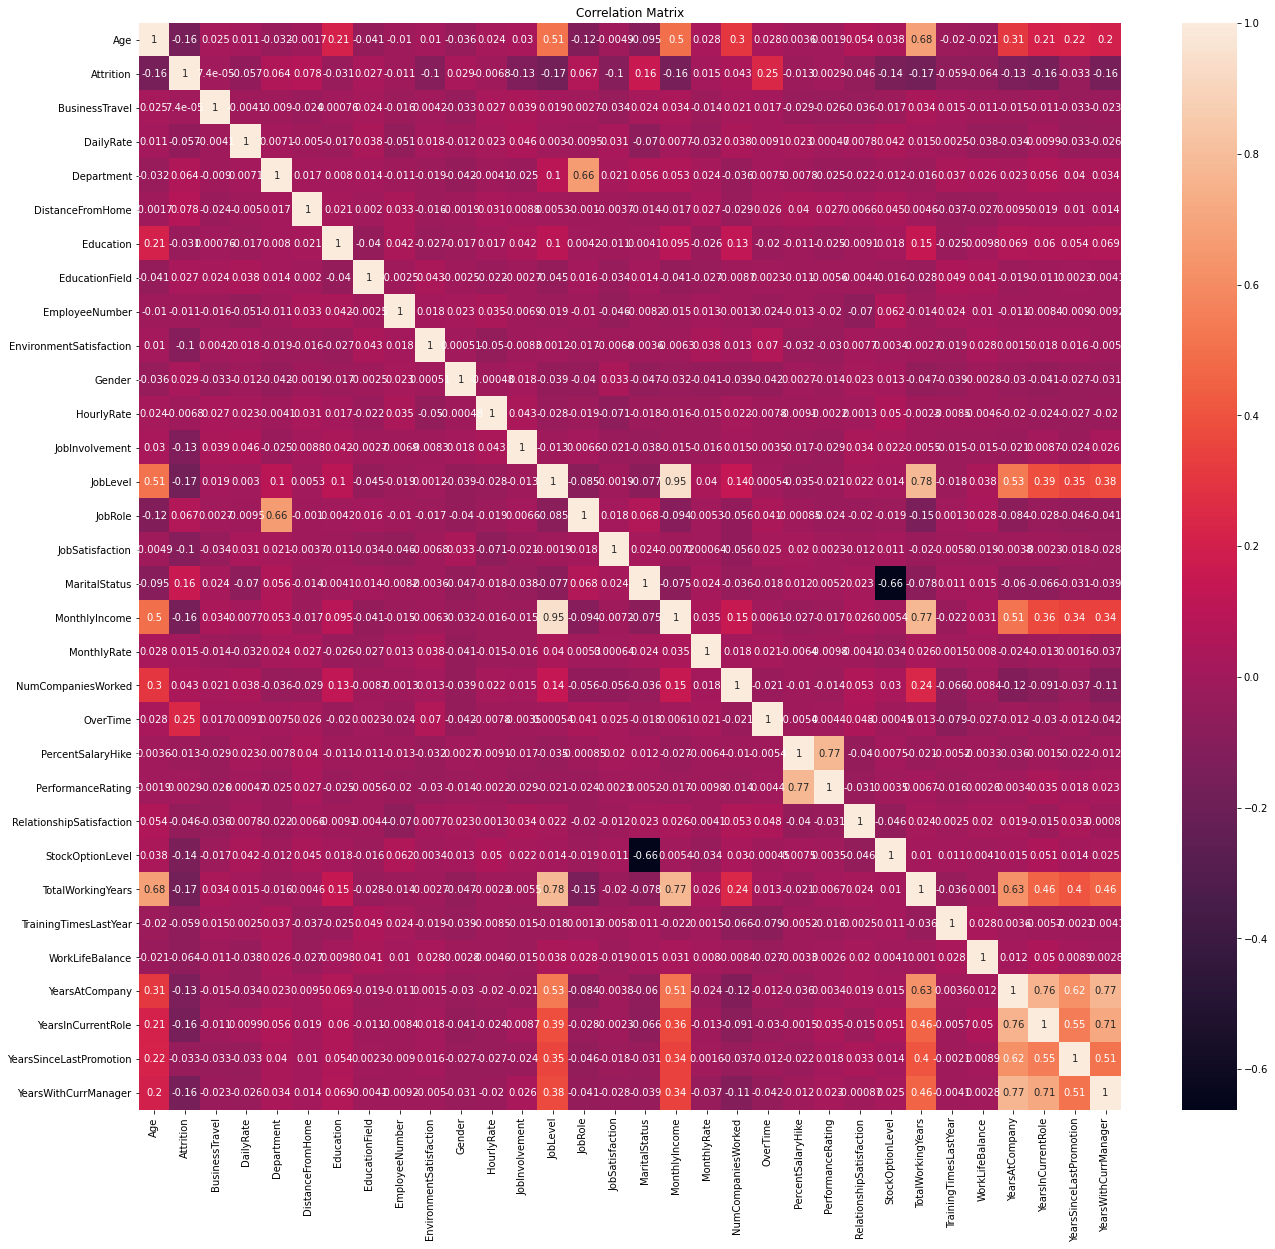

In [53]:
plt.figure(figsize=[22,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

## Lets check outliers with box plot

Age                            AxesSubplot(0.125,0.799681;0.168478x0.0803191)
Attrition                   AxesSubplot(0.327174,0.799681;0.168478x0.0803191)
BusinessTravel              AxesSubplot(0.529348,0.799681;0.168478x0.0803191)
DailyRate                   AxesSubplot(0.731522,0.799681;0.168478x0.0803191)
Department                     AxesSubplot(0.125,0.703298;0.168478x0.0803191)
DistanceFromHome            AxesSubplot(0.327174,0.703298;0.168478x0.0803191)
Education                   AxesSubplot(0.529348,0.703298;0.168478x0.0803191)
EducationField              AxesSubplot(0.731522,0.703298;0.168478x0.0803191)
EmployeeNumber                 AxesSubplot(0.125,0.606915;0.168478x0.0803191)
EnvironmentSatisfaction     AxesSubplot(0.327174,0.606915;0.168478x0.0803191)
Gender                      AxesSubplot(0.529348,0.606915;0.168478x0.0803191)
HourlyRate                  AxesSubplot(0.731522,0.606915;0.168478x0.0803191)
JobInvolvement                 AxesSubplot(0.125,0.510532;0.1684

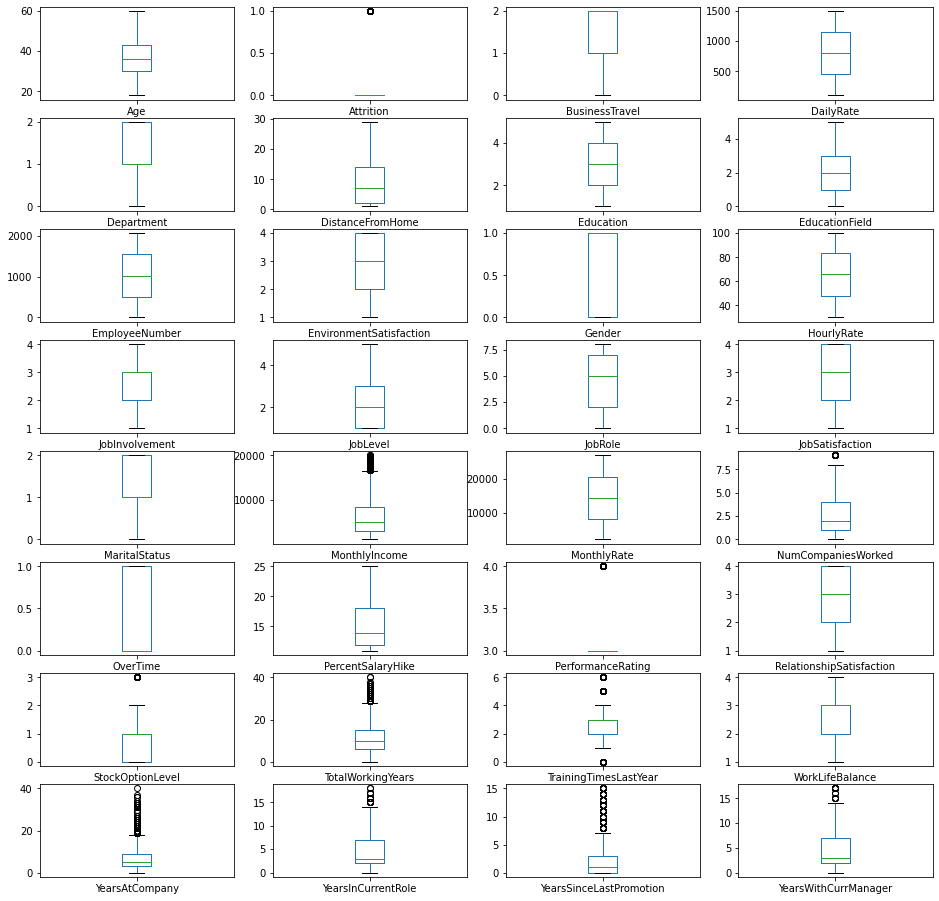

In [54]:
df_column_dropped.plot(kind='box',subplots=True,layout=(8,4),figsize=[16,16])

## Lets check Skewness:

In [55]:
collist2=df_column_dropped.columns.values

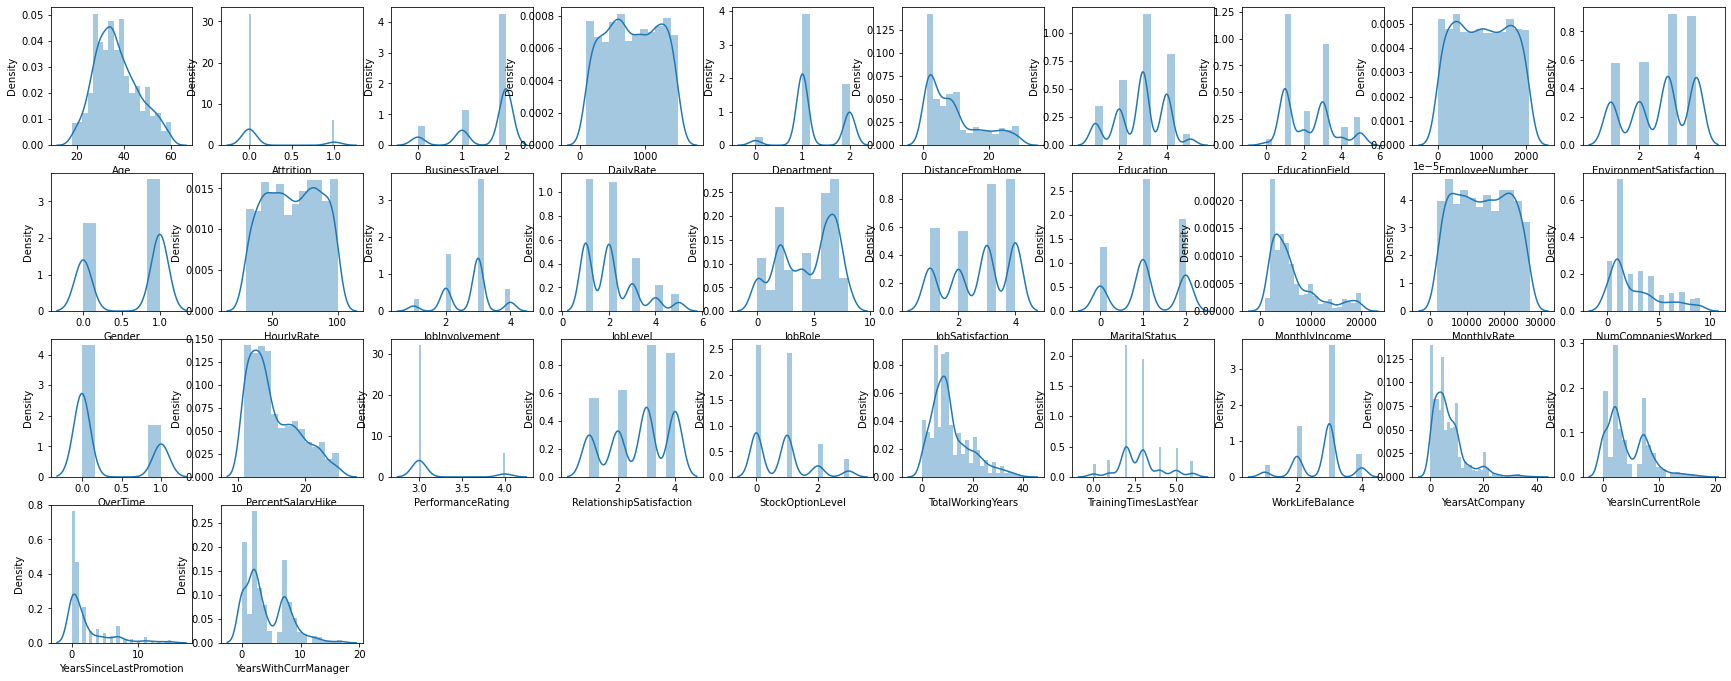

In [56]:
plt.figure(figsize=(30,30))
for i in range(0,len(collist2)):
    plt.subplot(10,10,i+1)
    sns.distplot(df_column_dropped[collist2[i]])

In [57]:
df_column_dropped.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

In [58]:
from scipy.stats import zscore
z=np.abs(zscore(df_column_dropped))
df_zscore=df_column_dropped[(z<3).all(axis=1)]

In [59]:
df_zscore.shape

(1387, 32)

In [60]:
df_column_dropped.shape

(1470, 32)

In [61]:
((1470-1387)/1470)*100

5.646258503401361

# Imbalanced Data Handeling:

In [62]:
df_zscore.Attrition.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

In [63]:
df_zscore.shape

(1387, 32)

In [64]:
count_class0,count_class1=df_zscore.Attrition.value_counts()

In [65]:
count_class0 ,count_class1

(1158, 229)

In [66]:
df_class0=df_zscore[df_zscore['Attrition']==0]
df_class1=df_zscore[df_zscore['Attrition']==1]

In [67]:
df_class0.shape

(1158, 32)

In [68]:
df_class1.shape

(229, 32)

In [69]:
df_class_oversample=df_class1.sample(count_class0,replace=True)
df_class_oversample.shape

(1158, 32)

In [70]:
df_final_oversample=pd.concat([df_class0,df_class_oversample],axis=0)
df_final_oversample.shape

(2316, 32)

In [71]:
print("Ramdom Over sampling:")
print(df_final_oversample.Attrition.value_counts())

Ramdom Over sampling:
1    1158
0    1158
Name: Attrition, dtype: int64


In [72]:
x=df_final_oversample.drop("Attrition",axis=1)
y=df_final_oversample["Attrition"]

In [73]:
#x=df_zscore.drop("Attrition",axis=1)
#y=df_zscore["Attrition"]

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=6,stratify=y)

In [75]:
y_train.value_counts()

1    903
0    903
Name: Attrition, dtype: int64

# Skewness Removal:

In [76]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)
df_skew=pd.DataFrame(df_skew,columns=x.columns)

#from scipy.stats import boxcox
#df_skew['BusinessTravel']=boxcox(df_skew['BusinessTravel'],0)

In [77]:
df_skew.skew()

Age                        -0.004261
BusinessTravel             -0.835121
DailyRate                  -0.183148
Department                 -0.019465
DistanceFromHome           -0.032828
Education                  -0.110566
EducationField             -0.015304
EmployeeNumber             -0.295506
EnvironmentSatisfaction    -0.178917
Gender                     -0.462982
HourlyRate                 -0.090593
JobInvolvement             -0.050588
JobLevel                    0.219922
JobRole                    -0.357345
JobSatisfaction            -0.184684
MaritalStatus              -0.228433
MonthlyIncome               0.033568
MonthlyRate                -0.179595
NumCompaniesWorked          0.020186
OverTime                    0.457381
PercentSalaryHike           0.116316
PerformanceRating           1.867326
RelationshipSatisfaction   -0.186073
StockOptionLevel            0.263965
TotalWorkingYears          -0.029356
TrainingTimesLastYear       0.066056
WorkLifeBalance            -0.036832
Y

In [78]:
x=df_skew

In [79]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=i,stratify=y)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  "  ,maxAccu , "  at random_state:", maxRS)

Best accuracy is   0.8235294117647058   at random_state: 80


In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=80,stratify=y)

# Applying Models:

In [81]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(f1_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9215686274509803
0.927007299270073
[[216  39]
 [  1 254]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       255
           1       0.87      1.00      0.93       255

    accuracy                           0.92       510
   macro avg       0.93      0.92      0.92       510
weighted avg       0.93      0.92      0.92       510



In [82]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(f1_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9764705882352941
0.976923076923077
[[244  11]
 [  1 254]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       255
           1       0.96      1.00      0.98       255

    accuracy                           0.98       510
   macro avg       0.98      0.98      0.98       510
weighted avg       0.98      0.98      0.98       510



In [83]:
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.9333333333333333
[[232  23]
 [ 11 244]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       255
           1       0.91      0.96      0.93       255

    accuracy                           0.93       510
   macro avg       0.93      0.93      0.93       510
weighted avg       0.93      0.93      0.93       510



In [84]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7431372549019608
[[189  66]
 [ 65 190]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       255
           1       0.74      0.75      0.74       255

    accuracy                           0.74       510
   macro avg       0.74      0.74      0.74       510
weighted avg       0.74      0.74      0.74       510



In [85]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.8470588235294118
[[212  43]
 [ 35 220]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       255
           1       0.84      0.86      0.85       255

    accuracy                           0.85       510
   macro avg       0.85      0.85      0.85       510
weighted avg       0.85      0.85      0.85       510



In [86]:
scr=cross_val_score(dt,x,y,cv=5,scoring='f1')
print("Cross Validation Score of DecisionTree Model is : ", scr.mean())

Cross Validation Score of DecisionTree Model is :  0.8104264784446776


In [87]:
scr=cross_val_score(rf,x,y,cv=5,scoring='f1')
print("Cross Validation Score of RandomForest Model is : ", scr.mean())

Cross Validation Score of RandomForest Model is :  0.837607565143356


In [88]:
scr=cross_val_score(svc,x,y,cv=5,scoring='f1')
print("Cross Validation Score of Support Vector Model is : ", scr.mean())

Cross Validation Score of Support Vector Model is :  0.8890419983062936


In [89]:
scr=cross_val_score(gnb,x,y,cv=5,scoring='f1')
print("Cross Validation Score of GussianNB Model is : ", scr.mean())

Cross Validation Score of GussianNB Model is :  0.6994104940133898


In [90]:
scr=cross_val_score(ab,x,y,cv=5,scoring='f1')
print("Cross Validation Score of AdaBoost Model is : ", scr.mean())

Cross Validation Score of GussianNB Model is :  0.6591255287210074


In [91]:
#svm = SVC(kernel=”rbf”) : 
parameters = {'C': [1, 10, 100],'gamma': [.01, .1],'kernel':['poly','rbf','sigmoid']}
    
# AdaBoost regression:
#boost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state=90)
#parameters = {'n_estimators': (1, 2),'base_estimator__max_depth': (1, 2)}
#parameters={'max_depth': np.arange(2,10),
#             'criterion': ['gini','entropy']}
# nneighbors : parameters = dict(n_neighbors = [1,3,5,7,9])

In [92]:
gcv=GridSearchCV(SVC(), parameters,cv=5) #Tuning svc

In [93]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.1],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [94]:
gcv.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [119]:
mod=SVC(C=10,gamma=0.1,kernel='rbf',random_state=80)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

99.2156862745098


In [107]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [108]:
gcv=GridSearchCV(GaussianNB(), params_NB,cv=5) #Tuning NB

In [109]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [110]:
gcv.best_params_

{'var_smoothing': 0.43287612810830584}

In [118]:
mod1=GaussianNB(var_smoothing=0.43287612810830584)
mod1.fit(x_train,y_train)
pred=mod1.predict(x_test)
print(accuracy_score(y_test,pred)*100)

74.70588235294117


# We have got 99.21% accuracy from SVC model.Hence it si best model to proceed for Prediction.

### Lets Check with AUC-ROC curve % :

In [96]:
from sklearn.metrics import plot_roc_curve

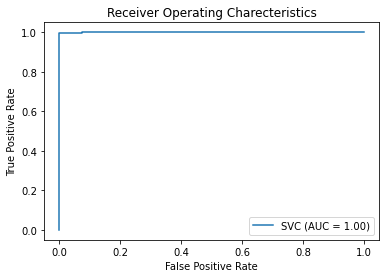

In [120]:
plot_roc_curve(mod,x_test,y_test)
plt.title('Receiver Operating Charecteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

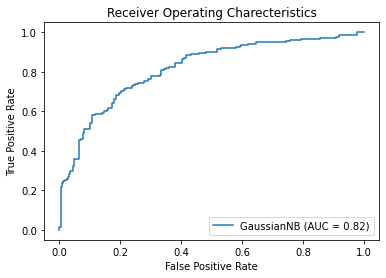

In [106]:
plot_roc_curve(gnb,x_test,y_test)
plt.title('Receiver Operating Charecteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Observation: Seems to be almost 100% with SVC model in AUC-ROC plot which is best percentage score.

# Saving the model:

In [99]:
import joblib
joblib.dump(mod,"Attrition_model.pkl")

['Attrition_model.pkl']

# Loading the model:

In [100]:
model=joblib.load("Attrition_model.pkl")

In [101]:
prediction=model.predict(x_test)

In [102]:
print(accuracy_score(y_test,prediction)*100)

99.2156862745098


In [103]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [104]:
prediction.to_csv('Attrition_model.csv') #Saving the predictions

In [105]:
prediction

,0
0,1
1,1
2,0
3,1
4,1
...,...
505,0
506,1
507,1
508,0


### Summary and Observation:
Hence we have Saved the model and 
Checked by loading whether its working fine. and ckecked with predicting.